In [112]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('/home/daniel/Downloads/salaries.csv')

In [113]:
#What columns are we working with
data.columns

Index(['club', 'last_name', 'first_name', 'position', 'base_salary',
       'guaranteed_compensation'],
      dtype='object')

In [114]:
#Let's group salaries by club
clubSalaries=data.groupby('club')['base_salary'].median()
clubSalaries

club
CHI     44100.00
CHV     54995.80
CLB     46331.25
COL     55000.00
DAL     45000.00
DC      36000.00
HOU     51149.00
KC      33075.00
LA      63750.00
NE      35500.00
NY      48000.00
Pool    17700.00
RSL     48000.00
TFC     50000.00
Name: base_salary, dtype: float64

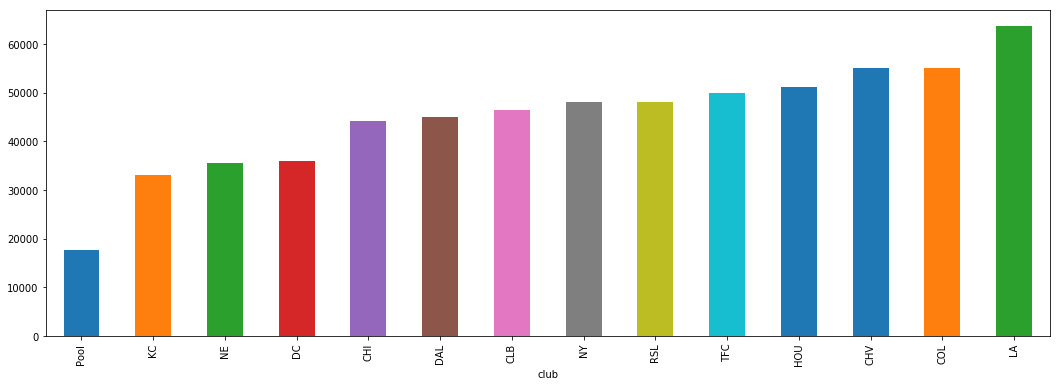

In [115]:
clubSalaries=clubSalaries.sort_values()
clubSalaries.plot(figsize=(18, 6), kind='bar')
#This graph shows us there seems to be a correlation between club and salary

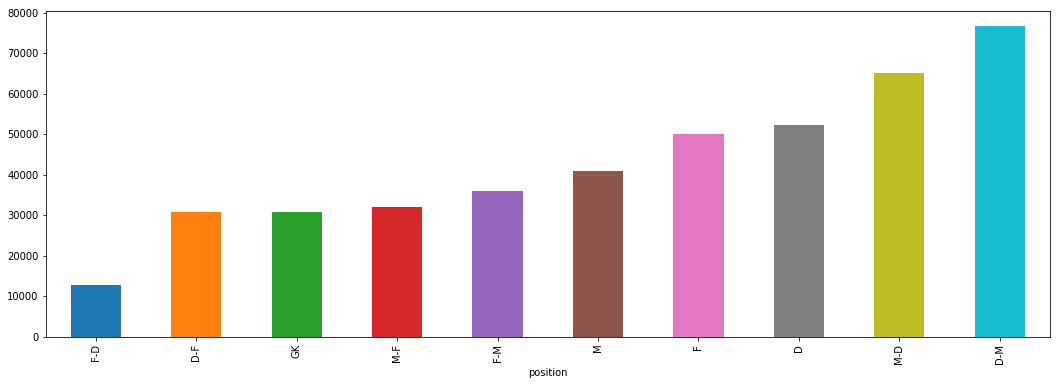

In [116]:
positionSalaries=data.groupby('position')['base_salary'].median()
positionSalaries=positionSalaries.sort_values()
positionSalaries.plot(figsize=(18, 6), kind='bar')
#here we see position also plays a large role

In [117]:
data.loc[100]

club                          COL
last_name                  Hughes
first_name                 Justin
position                       GK
base_salary                 12900
guaranteed_compensation     12900
Name: 100, dtype: object

In [118]:
#Now I'm going to take the data from 2007-2017 and make one big set
data2007=pd.read_csv('/home/daniel/Documents/mls-salaries-2007.csv')
data2008=pd.read_csv('/home/daniel/Documents/mls-salaries-2008.csv')
data2009=pd.read_csv('/home/daniel/Documents/mls-salaries-2009.csv')
data2010=pd.read_csv('/home/daniel/Documents/mls-salaries-2010.csv')
data2011=pd.read_csv('/home/daniel/Documents/mls-salaries-2011.csv')
data2012=pd.read_csv('/home/daniel/Documents/mls-salaries-2012.csv')
data2013=pd.read_csv('/home/daniel/Documents/mls-salaries-2013.csv')
data2014=pd.read_csv('/home/daniel/Documents/mls-salaries-2014.csv')
data2015=pd.read_csv('/home/daniel/Documents/mls-salaries-2015.csv')
data2016=pd.read_csv('/home/daniel/Documents/mls-salaries-2016.csv')
data2017=pd.read_csv('/home/daniel/Documents/mls-salaries-2017.csv')


In [119]:
dataArray=[data2007, data2008, data2009, data2010, data2011, data2012, data2013, data2014, data2015, data2016, data2017]

In [120]:
#Now all the datasets have a year column with an appropriate year
year=2007
for data in dataArray:
    data['year']=year
    year=year+1

In [121]:
allData=pd.concat(dataArray)
allData.head()

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year
0,CHI,Armas,Chris,M,225000.0,225000.0,2007
1,CHI,Banner,Michael,M,12900.0,12900.0,2007
2,CHI,Barrett,Chad,F,41212.5,48712.5,2007
3,CHI,Blanco,Cuauhtemoc,F,2492316.0,2666778.0,2007
4,CHI,Brown,C.J.,D,106391.0,106391.0,2007


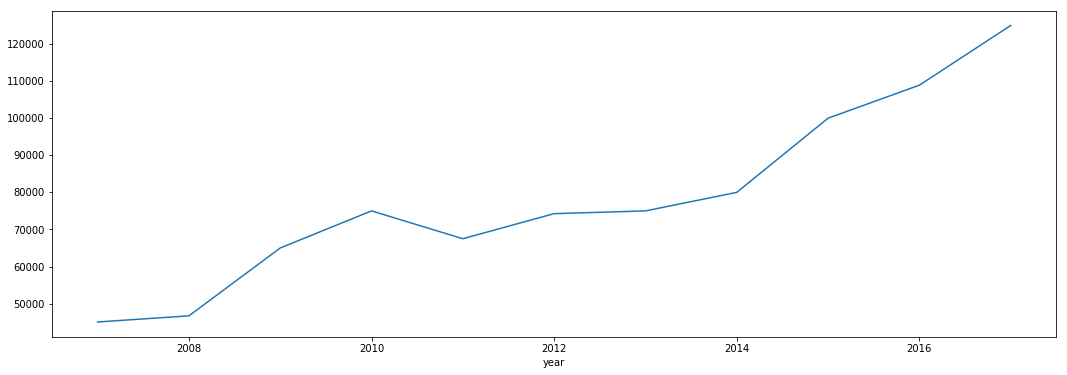

In [122]:
#Now lets see how base salary by year looks
yearData=allData.groupby('year')['base_salary'].median()
yearData.plot(figsize=(18,6))

#This turns out to be a very important attribute, as salary more than doubles from 2007 to 2017

In [123]:
allData.iloc[723]

club                              DC
last_name                  Stratford
first_name                       Dan
position                           M
base_salary                    17700
guaranteed_compensation        17700
year                            2008
Name: 352, dtype: object

In [124]:
#Making Dummy variables for all the clubs in the data
clubDummies=pd.get_dummies(allData['club'])

In [125]:
allData=pd.concat([allData, clubDummies], axis=1)

In [126]:
#Making Dummy variables for all the years in the data
yearDummies=pd.get_dummies(allData['year'])

In [127]:
allData=pd.concat([allData, yearDummies], axis=1)

In [128]:
clubArray=pd.unique(allData['club'])
yearArray=pd.unique(allData['year'])

In [129]:
x_data=allData[yearArray]
x_data.shape

(5553, 11)

In [130]:
import numpy as np
clubArray=np.delete(clubArray, -7)
x_data1=allData[clubArray]

x_data=pd.concat([x_data, x_data1], axis=1)
x_data.shape


(5553, 40)

In [132]:
y_data=allData['base_salary']

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, random_state=1)

In [146]:

from sklearn.linear_model import LinearRegression

#Instantiates the model
linearReg=LinearRegression()


In [155]:
import math
x=0;
for column in x_train:
    for value in x_train[column]:
        x=x+1
        if(value!=0 and value!=1):
            print("Fuck")
print(x)            

 

166560


In [165]:
linearReg.fit(x_train, y_train)
               

 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [169]:
for columns in x_train:
    x_train[columns].fillna(0)

In [173]:
y_train.fillna(y_train.median())

577     191762.50
92       42000.00
313     110000.00
329      62500.00
450     210000.00
378      33000.00
270      35125.00
420     240000.00
83       60000.00
270      51500.04
128      33000.00
11      106875.00
167      98670.00
103     720000.00
134      60000.00
1        50000.00
379     434500.00
315     350000.00
195      48825.00
491      65004.00
487     140000.00
151      12900.00
455     325000.00
483      72000.00
138     750000.00
43      275000.00
462      53000.00
111      60000.00
67     6000000.00
467     185000.00
          ...    
249      60582.50
328      75000.00
307      80000.00
314     120000.00
357      40000.00
382      12900.00
389      90000.00
522      33750.00
191      33000.00
382      62500.00
326     160000.00
252     131250.00
410      50004.00
302      35125.00
71      101000.00
437      65004.00
459     110000.00
32      180000.00
226      72500.00
137     600000.00
417      60000.00
144      45000.00
119     250000.08
235      71500.00
103     17

In [174]:
linearReg.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').